In [1]:
from finvizfinance.quote import finvizfinance
ticker = 'NFLX'
stock = finvizfinance(ticker)

In [2]:
news_df = stock.ticker_news()
news_df['Tickers'] = ticker
news_df

,Date,Title,Link,Tickers
0,2023-03-05 20:56:00,Netflix making live-action 'One Piece' from po...,https://finance.yahoo.com/news/netflix-making-...,NFLX
1,2023-03-05 15:06:00,Britain's Prince Harry invited to King Charles...,https://finance.yahoo.com/news/britains-prince...,NFLX
2,2023-03-05 08:38:00,Chris Rock Slaps Back in Netflixs First Live C...,https://finance.yahoo.com/m/40e4ae24-8fb3-3d6c...,NFLX
3,2023-03-05 00:32:00,Chris Rock unleashes on Will Smith and wife Ja...,https://finance.yahoo.com/news/chris-rock-unle...,NFLX
4,2023-03-03 15:44:00,Netflix is still Netflix as they produce live ...,https://finance.yahoo.com/video/netflix-still-...,NFLX
...,...,...,...,...
95,2023-02-12 10:31:00,2 Stocks That Are Fantastic Deals Right Now,https://finance.yahoo.com/m/6aa18f20-0dfb-359d...,NFLX
96,2023-02-12 07:31:00,"1 Growth Stock to Buy in 2023, and 1 to Avoid ...",https://finance.yahoo.com/m/28459ca2-4694-3433...,NFLX
97,2023-02-12 07:15:00,A Bull Market Is Coming: 1 FAANG Stock to Avoi...,https://finance.yahoo.com/m/f14b0c34-cc79-32c3...,NFLX
98,2023-02-11 17:05:00,Is Netflix Stock A Buy After Video Streamer's ...,https://finance.yahoo.com/m/815ee59a-c296-3fd4...,NFLX


In [3]:
outer_ratings_df = stock.ticker_outer_ratings()
outer_ratings_df

,Date,Status,Outer,Rating,Price
0,2023-01-23,Reiterated,Argus,Buy,$340 → $390
1,2023-01-20,Reiterated,Wolfe Research,Outperform,$366 → $417
2,2023-01-20,Reiterated,Wedbush,Outperform,$400 → $410
3,2023-01-20,Reiterated,The Benchmark Company,Sell,$225 → $250
4,2023-01-20,Reiterated,Robert W. Baird,Neutral,$275 → $325
5,2023-01-20,Reiterated,Pivotal Research Group,Buy,$375 → $400
6,2023-01-20,Reiterated,Piper Sandler,Neutral,$270 → $325
7,2023-01-20,Reiterated,Oppenheimer,Outperform,$400 → $415
8,2023-01-20,Reiterated,MoffettNathanson,Market Perform,$240 → $250
9,2023-01-20,Reiterated,Jefferies,Buy,$385 → $400


In [4]:
import yfinance as yf
ticker= get_data("amzn", start_date="12/04/2009", end_date="12/04/2019", index_as_date = True, interval="1wk")
ticker.info

NameError: name 'get_data' is not defined

In [ ]:
import yahoo_fin.stock_info as si
dow_list = si.tickers_nasdaq()
print("Tickers in NasdaQ:", len(dow_list))
dow_list

In [ ]:
import yahoo_fin.stock_info as si
si.get_analysts_info('nflx')

In [ ]:
from yahoo_fin.stock_info import *
import yfinance as yf
nasdaq = tickers_nasdaq()
nasdaq_list = nasdaq[:10]
for i in nasdaq_list:
    ticker = yf.download(i,interval='1m',period='1d',progress=False)
    ticker['Ticker'] = i
    print(ticker)

In [ ]:
from yahoo_fin.stock_info import *
import yfinance as yf
ticker = "ACE.BK"
data = yf.Ticker(ticker)
data.news

In [ ]:
from bs4 import BeautifulSoup
import requests


url = 'https://www.nasdaq.com/articles/will-roku-stock-break-hearts-this-week'
headers = {
    'User-Agent': 'Chrome/58.0.3029.110'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'lxml')
data = soup.find('h1', class_='jupiter22-c-hero-article-title')

if data:
    print(data.text)
else:
    print('Could not find the data')

In [ ]:
import unittest
from unittest.mock import patch,MagicMock
import sqlite3
import pandas as pd
import datetime as dt
import yfinance as yf
from pandas.testing import assert_frame_equal

def save_data_news(data):
    # connect to the database
    conn = sqlite3.connect('stock.sqlite')
    # save the data to the database
    data.to_sql('stock_news',con=conn,if_exists='append',index=False)
    # close the connection
    conn.close()
df2 = pd.DataFrame()
df1 = pd.DataFrame({'Datetime': ['2023-02-19'], 'Title':['ทอท.'], 'Link':['Test'], 'Body':['Test'], 'Ticker':['AOT']})
df2 = pd.concat([df2,df1],ignore_index=True)
save_data_news(df2)


Spatial

In [1]:
import sqlite3
import pandas as pd
import datetime as dt
import yfinance as yf

content_news = []
conn = sqlite3.connect("stock.sqlite")
cur = conn.cursor()
query = "SELECT Ticker FROM stock_info"
r_df = pd.read_sql(query, conn)
list_db = r_df['Ticker'].values.tolist()
df2 = pd.DataFrame()

for i in list_db:
    query2 = "SELECT Datetime,ticker,body FROM stock_news WHERE `Ticker` = '%s'" % i
    news = pd.read_sql(query2, conn)
    if not(news.empty):
        df2 = pd.concat([df2,news],ignore_index=True)
    
df2

,Datetime,Ticker,Body
0,2023-02-06 00:00:00,AAV.BK,ผู้สื่อข่าวรายงานว่า วันนี้(6 ก.พ.) เป็นวันแรก...
1,2023-02-02 00:00:00,AAV.BK,นายกรภัทร วรเชษฐ์ ผู้อำนวยการ ฝ่ายวิจัยและการบ...
2,2023-02-01 00:00:00,AAV.BK,ADVERTISEMENT\nบริษัทหลักทรัพย์ ไอร่า จำกัด ระ...
3,2023-01-31 00:00:00,AAV.BK,ADVERTISEMENT\n บล.โนมูระ พัฒนสิน ระบุในบทวิเค...
4,2023-01-30 00:00:00,AAV.BK,อาการ “กลืนไม่เข้า…คายไม่ออก” ของเหล่าบรรดา “ผ...
...,...,...,...
40871,2022-11-29 00:00:00,ZS,Shares of several cybersecurity firms are trad...
40872,2022-11-29 00:00:00,ZS,Someone with a lot of money to spend has taken...
40873,2022-11-29 00:00:00,ZS,The increased demand for security and networki...
40874,2022-11-28 00:00:00,ZS,Needham analyst reiterated Buy on CrowdStrike ...


In [2]:
import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Best\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Best\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Best\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Best\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Best\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Best\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_pe

True

In [2]:
import locationtagger
from geopy.geocoders import Nominatim

# initializing sample text
sample_text = "India has very rich and vivid culture\
       widely spread from Kerala to Nagaland to Haryana to Maharashtra. " \
       "Delhi being capital with Mumbai financial capital.\
       Can be said better than some western cities such as " \
       " Munich, London etc. Pakistan and Bangladesh share its borders"

def getcity_to_latlong(text):
    # extracting entities.
    place_entity = locationtagger.find_locations(text = text)

    # calling the Nominatim tool
    loc = Nominatim(user_agent="GetLoc")
    address = pd.DataFrame()

    for i in place_entity.cities:
        getLoc = loc.geocode(i)
        ones = pd.DataFrame({'city':[i],'lat':[getLoc.latitude],'long':[getLoc.longitude]})
        # getting all cities
        address = pd.concat([address,ones],ignore_index=True)
    return address

getcity_to_latlong(sample_text)

,city,lat,long
0,Mumbai,19.078545,72.878176
1,Delhi,28.651718,77.221939
2,London,51.507336,-0.127650
3,Munich,48.137108,11.575382
4,Haryana,29.000000,76.000000


In [3]:
a = len(df2)
print(a)

40876


In [22]:
place = pd.DataFrame()
count = 10000
a = len(df2)
#5529, 7218, 7249 error 
try:
    for i in range(10000,a):
        # if count < 5000:
        #     data = getcity_to_latlong(df2.iloc[i]['Body'])
        #     data['Datetime'] = df2.iloc[i]['Datetime']
        #     data['Ticker'] = df2.iloc[i]['Ticker']
        #     place = pd.concat([place,data],ignore_index=True)
        # if count >= 5000 and count < 10000:
        #     data = getcity_to_latlong(df2.iloc[i]['Body'])
        #     data['Datetime'] = df2.iloc[i]['Datetime']
        #     data['Ticker'] = df2.iloc[i]['Ticker']
        #     place = pd.concat([place,data],ignore_index=True)
        if count >= 10000 and count < 15000:
            data = getcity_to_latlong(df2.iloc[i]['Body'])
            data['Datetime'] = df2.iloc[i]['Datetime']
            data['Ticker'] = df2.iloc[i]['Ticker']
            place = pd.concat([place,data],ignore_index=True)
        # if count >= 15000 and count < 20000:
        #     data = getcity_to_latlong(df2.iloc[i]['Body'])
        #     data['Datetime'] = df2.iloc[i]['Datetime']
        #     data['Ticker'] = df2.iloc[i]['Ticker']
        #     place = pd.concat([place,data],ignore_index=True)
        # if count >= 20000:
        #     data = getcity_to_latlong(df2.iloc[i]['Body'])
        #     data['Datetime'] = df2.iloc[i]['Datetime']
        #     data['Ticker'] = df2.iloc[i]['Ticker']
        #     place = pd.concat([place,data],ignore_index=True)
        else:
            break
        count += 1
except:
    pass
place

7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449


,city,lat,long,Datetime,Ticker
0,New York,40.712728,-74.006015,2022-12-07 00:00:00,BKR
1,Globe,41.990376,-71.523673,2022-12-07 00:00:00,BKR
2,Us,39.783730,-100.445882,2022-12-07 00:00:00,BKR
3,Dow,52.200158,0.124222,2022-12-02 00:00:00,BKR
4,London,51.507336,-0.127650,2022-12-02 00:00:00,BKR
...,...,...,...,...,...
1720,Box,51.421187,-2.250246,2023-01-09 00:00:00,COST
1721,Cost,46.692749,2.596373,2023-01-09 00:00:00,COST
1722,Stock,53.648602,23.396771,2023-01-06 00:00:00,COST
1723,Macy,42.113108,-96.356432,2023-01-06 00:00:00,COST


In [23]:
# เพื่อ save ระวังข้อมูลซ้ำด้วยเด้อ
import sqlite3

address = place

conn = sqlite3.connect("stock.sqlite")
address.to_sql('stock_city',con=conn,if_exists='append',index=False)

1725

In [6]:
address = place
add = address.groupby(address.columns.tolist(),as_index=False).size()
add.rename(columns={'size': 'population'}, inplace=True)
add

,city,lat,long,population
0,Access,38.209249,-83.071005,1
1,Allen,40.807780,-84.057222,1
2,Almaty,43.236392,76.945728,1
3,America,39.783730,-100.445882,1
4,Bank,51.513105,-0.089375,2
5,Barron,45.423557,-91.845410,1
6,Bristol,51.453802,-2.597298,1
7,Calgary,51.046095,-114.065465,1
8,California,36.701463,-118.755997,1
9,Canada,61.066692,-107.991707,1


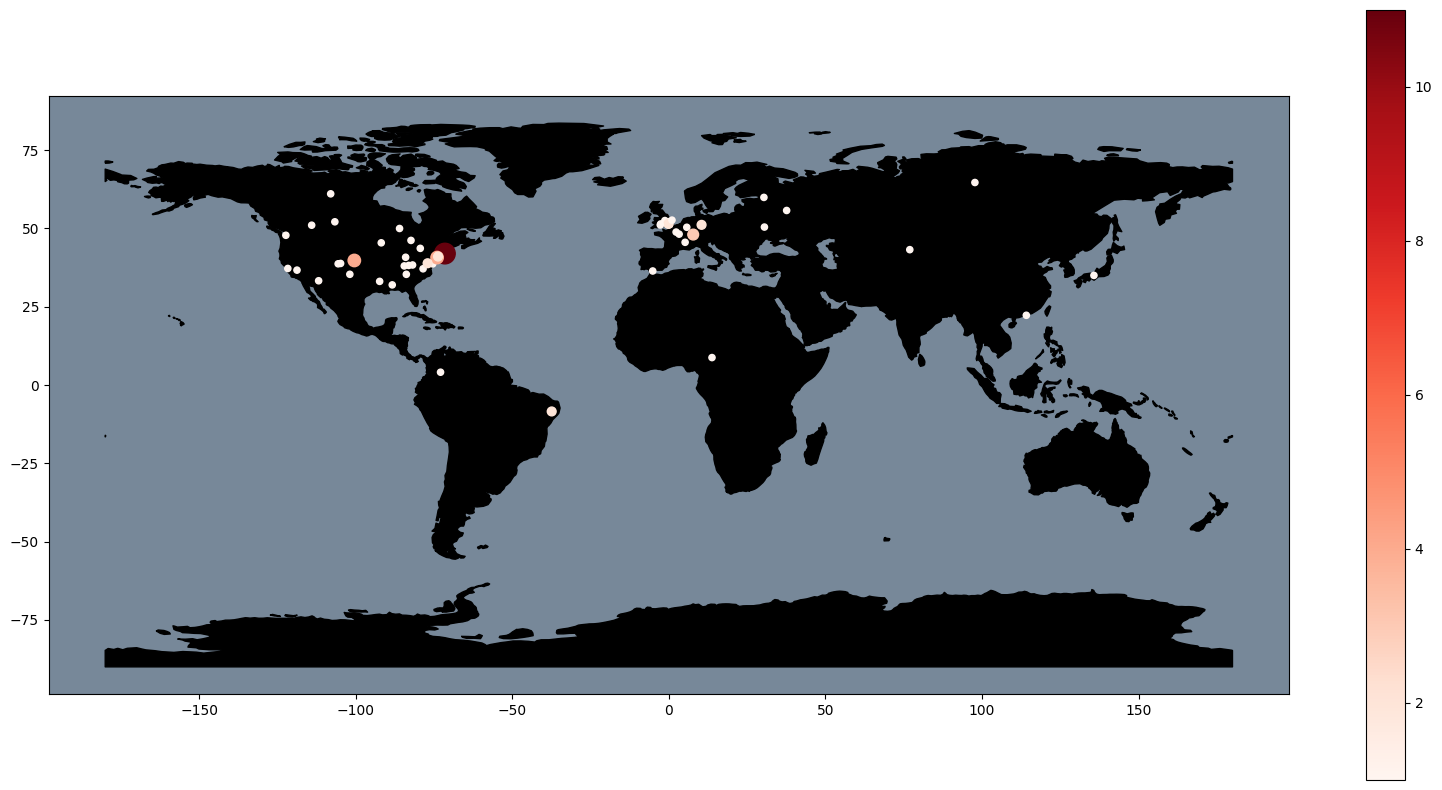

In [16]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = add

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   
gdf['Size'] = gdf['population'] * 20
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(20, 10),color='black', edgecolor='black')
a = gdf.plot(ax=base, marker='o', column='population', cmap = 'Reds', markersize='Size',legend=True)
a.set_facecolor("lightslategray")

In [10]:
gdf

,city,lat,long,population,geometry
0,Access,38.209249,-83.071005,1,POINT (-83.07101 38.20925)
1,Allen,40.807780,-84.057222,1,POINT (-84.05722 40.80778)
2,Almaty,43.236392,76.945728,1,POINT (76.94573 43.23639)
3,America,39.783730,-100.445882,1,POINT (-100.44588 39.78373)
4,Bank,51.513105,-0.089375,2,POINT (-0.08937 51.51310)
5,Barron,45.423557,-91.845410,1,POINT (-91.84541 45.42356)
6,Bristol,51.453802,-2.597298,1,POINT (-2.59730 51.45380)
7,Calgary,51.046095,-114.065465,1,POINT (-114.06547 51.04610)
8,California,36.701463,-118.755997,1,POINT (-118.75600 36.70146)
9,Canada,61.066692,-107.991707,1,POINT (-107.99171 61.06669)


แปลภาษาไทย

In [2]:
import sqlite3
import pandas as pd
import datetime as dt
import yfinance as yf

content_news = []
conn = sqlite3.connect("stock.sqlite")
cur = conn.cursor()
query = "SELECT Ticker FROM stock_info WHERE `Index` = 'SET100'"
r_df = pd.read_sql(query, conn)
list_db = r_df['Ticker'].values.tolist()
thai = []
df2 = pd.DataFrame()

for i in list_db:
    thai.append(i.split('.')[0])

for j in thai:
    query2 = "SELECT Datetime,ticker,body FROM stock_news WHERE `Ticker` = '%s'" % j
    news = pd.read_sql(query2, conn)
    if not(news.empty):
        df2 = pd.concat([df2,news],ignore_index=True)
    
df2

,Datetime,Ticker,Body
0,2023-02-06 00:00:00,AAV,ผู้สื่อข่าวรายงานว่า วันนี้(6 ก.พ.) เป็นวันแรก...
1,2023-02-02 00:00:00,AAV,นายกรภัทร วรเชษฐ์ ผู้อำนวยการ ฝ่ายวิจัยและการบ...
2,2023-02-01 00:00:00,AAV,ADVERTISEMENT\nบริษัทหลักทรัพย์ ไอร่า จำกัด ระ...
3,2023-01-31 00:00:00,AAV,ADVERTISEMENT\n บล.โนมูระ พัฒนสิน ระบุในบทวิเค...
4,2023-01-30 00:00:00,AAV,อาการ “กลืนไม่เข้า…คายไม่ออก” ของเหล่าบรรดา “ผ...
...,...,...,...
6933,2022-09-08 00:00:00,WHA,บริษัท ดับบลิวเอชเอ อินดัสเตรียล ดีเวลลอปเมนท์...
6934,2022-09-05 00:00:00,WHA,นางสาวจรีพร จารุกรสกุล ประธานคณะกรรมการบริษัท ...
6935,2022-09-01 00:00:00,WHA,บริษัท ดับบลิวเอชเอ คอร์ปอเรชั่น จำกัด (มหาชน)...
6936,2022-08-31 00:00:00,WHA,บริษัท หลักทรัพย์โกลเบล็ก จำกัด ระบุในบทวิเครา...


In [16]:
import translators as ts
import translators.server as tss
import pandas as pd

count = 0
a = len(df2)
data_thai = pd.DataFrame()
for i in range(a):
    try:
        data = pd.DataFrame({'Datetime':[df2.iloc[i]['Datetime']],'Ticker':[df2.iloc[i]['Ticker']],'Eng':[tss.google(df2.iloc[i]['Body'])]})
        # data['Datetime'] = df2.iloc[i]['Datetime']
        # data['Ticker'] = df2.iloc[i]['Ticker']
        data_thai = pd.concat([data_thai,data],ignore_index=True)
    except:
        pass
data_thai

,Datetime,Ticker,Eng
0,2023-02-06 00:00:00,AAV,Reporters reported that today (6 February) is ...
1,2023-02-02 00:00:00,AAV,"Mr. Kornpat Worachet, Director of Research and..."
2,2023-02-01 00:00:00,AAV,Advertisement \n Ira Securities Company Limite...
3,2023-01-31 00:00:00,AAV,Advertisement \n Nomura Pattanasin Securities...
4,2023-01-30 00:00:00,AAV,"Symptoms ""Swallow ... ""The guardian of Santira..."
...,...,...,...
91,2023-01-30 00:00:00,ADVANC,"The Thai stock market index is closed at 1,681..."
92,2023-01-30 00:00:00,ADVANC,Advertisement \n Heng Heng shares \n If we wan...
93,2023-01-25 00:00:00,ADVANC,"Mr. Warun Thep Watcharaporn, Head of Business ..."
94,2023-01-25 00:00:00,ADVANC,"Overall, the global economy seems to have redu..."


In [18]:
place = pd.DataFrame()
count = 0
a = len(data_thai)
for i in range(a):
    data = getcity_to_latlong(data_thai.iloc[i]['Eng'])
    data['Datetime'] = data_thai.iloc[i]['Datetime']
    data['Ticker'] = data_thai.iloc[i]['Ticker']
    place = pd.concat([place,data],ignore_index=True)
place

,city,lat,long,Datetime,Ticker
0,Phuket,7.936602,98.352929,2023-02-06 00:00:00,AAV
1,Egypt,26.254049,29.267547,2023-02-06 00:00:00,AAV
2,Cuba,23.013134,-80.832875,2023-02-06 00:00:00,AAV
3,Singapore,1.357107,103.819499,2023-02-06 00:00:00,AAV
4,Russia,64.686314,97.745306,2023-02-06 00:00:00,AAV
...,...,...,...,...,...
155,Phuket,7.936602,98.352929,2022-11-14 00:00:00,AAV
156,Chiang Mai,18.788278,98.985880,2022-11-14 00:00:00,AAV
157,Don Mueang,13.922654,100.600997,2022-11-14 00:00:00,AAV
158,Us,39.783730,-100.445882,2022-11-14 00:00:00,AAV


In [23]:
# เพื่อ save ระวังข้อมูลซ้ำด้วยเด้อ
import sqlite3

address = place

conn = sqlite3.connect("stock.sqlite")
address.to_sql('stock_city',con=conn,if_exists='append',index=False)

160

In [19]:
address = place
add = address.groupby(address.columns.tolist(),as_index=False).size()
add.rename(columns={'size': 'population'}, inplace=True)
add

,city,lat,long,Datetime,Ticker,population
0,Anan,43.354900,0.817728,2023-01-19 00:00:00,AAV,1
1,Argentina,-34.996496,-64.967282,2023-01-23 00:00:00,AAV,1
2,Argentina,-34.996496,-64.967282,2023-02-06 00:00:00,AAV,1
3,Atlanta,33.748992,-84.390264,2022-11-22 00:00:00,AAV,1
4,Au,-24.776109,134.755000,2023-01-19 00:00:00,AAV,1
...,...,...,...,...,...,...
146,Us,39.783730,-100.445882,2023-01-16 00:00:00,AAV,1
147,Us,39.783730,-100.445882,2023-01-17 00:00:00,AAV,1
148,Valentine,43.094907,0.704317,2023-01-08 00:00:00,AAV,1
149,Valentine,43.094907,0.704317,2023-01-24 00:00:00,AAV,1


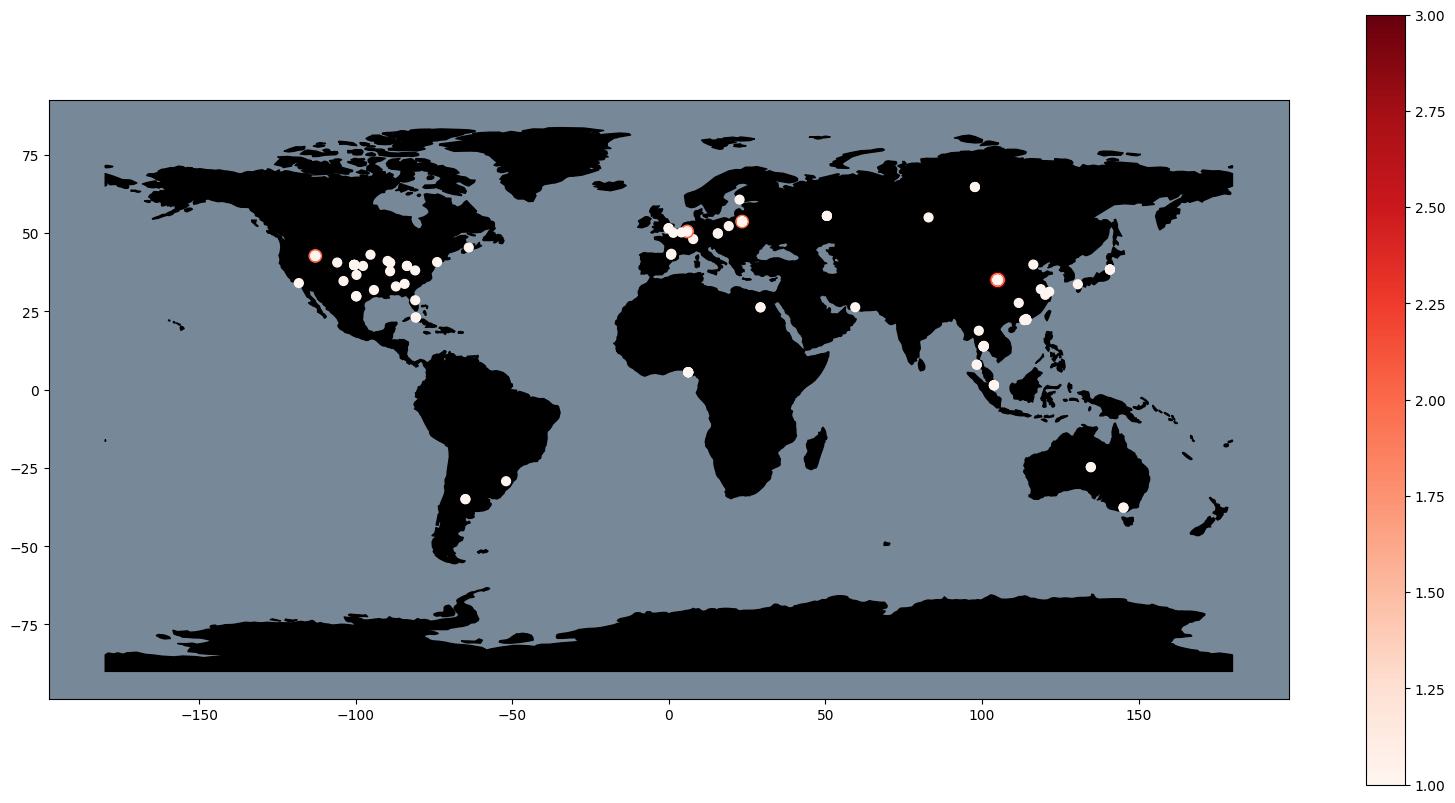

In [21]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = add

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   
gdf['Size'] = gdf['population'] * 40
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(20, 10),color='black', edgecolor='black')
a = gdf.plot(ax=base, marker='o', column='population', cmap = 'Reds', markersize='Size',legend=True)
a.set_facecolor("lightslategray")

In [ ]:
# เพื่อ save ระวังข้อมูลซ้ำด้วยเด้อ
import sqlite3

address = place

conn = sqlite3.connect("stock.sqlite")
address.to_sql('stock_city',con=conn,if_exists='append',index=True)

<AxesSubplot:>

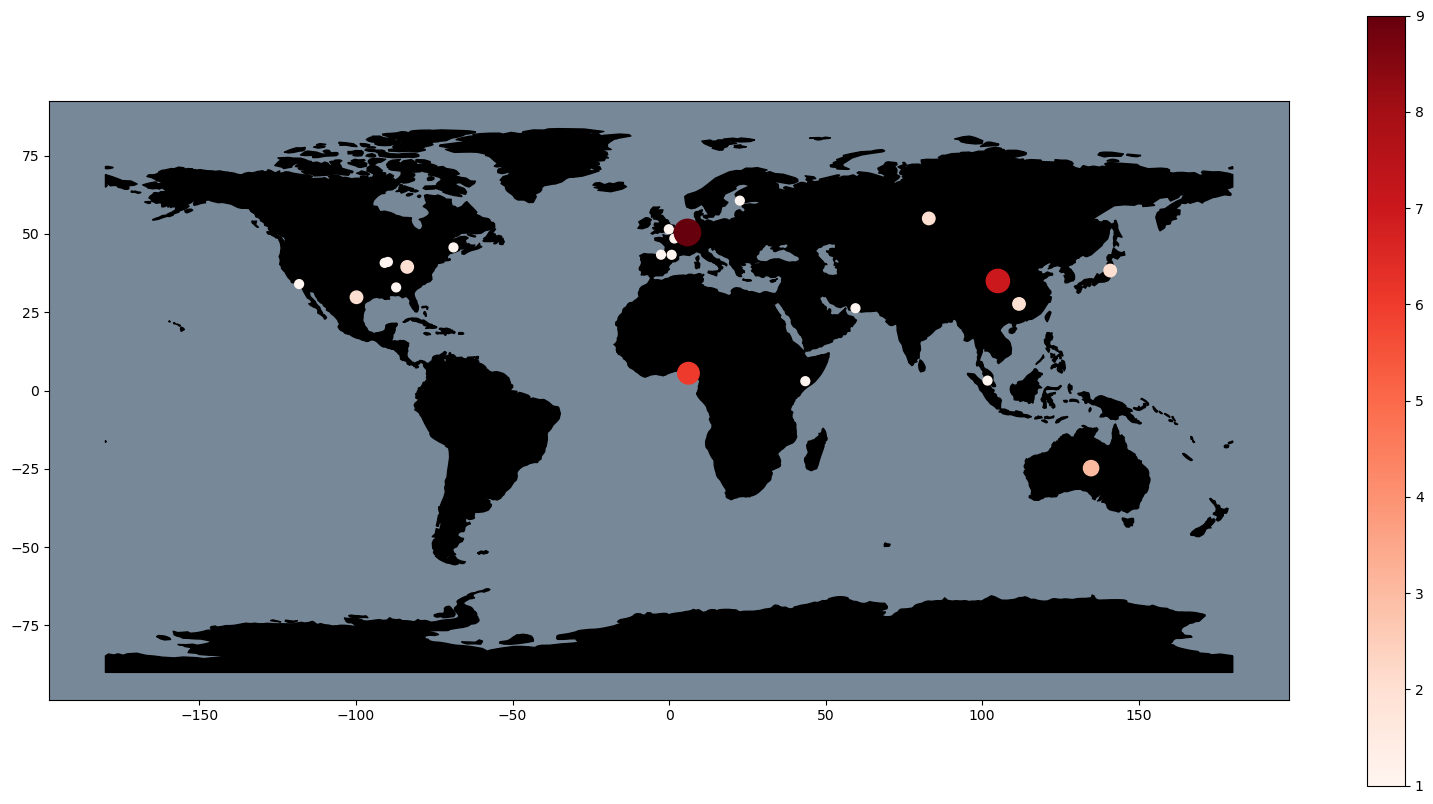

In [9]:
import pandas as pd
import sqlite3
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


def plot_spatial(ticker):
    conn = sqlite3.connect("stock.sqlite")
    query = "SELECT city,lat,long FROM stock_city WHERE `Ticker` = '%s'" % ticker
    address = pd.read_sql(query, conn)
    add = address.groupby(address.columns.tolist(),as_index=False).size()
    add.rename(columns={'size': 'population'}, inplace=True)
    df = add

    geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
    gdf = GeoDataFrame(df, geometry=geometry)   
    gdf['Size'] = gdf['population'] * 40
    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    base = world.plot(figsize=(20, 10),color='black', edgecolor='black')
    a = gdf.plot(ax=base, marker='o', column='population', cmap = 'Reds', markersize='Size',legend=True)
    a.set_facecolor("lightslategray")
    return a


plot_spatial('AAV.BK')

In [12]:
import pandas as pd
import sqlite3
import plotly.express as px

def plot_spatial(ticker):
    conn = sqlite3.connect("stock.sqlite")
    query = "SELECT city,lat,long FROM stock_city WHERE `Ticker` = '%s'" % ticker
    address = pd.read_sql(query, conn)
    add = address.groupby(address.columns.tolist(),as_index=False).size()
    add.rename(columns={'size': 'population'}, inplace=True)
    df = add

    fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="city", size="population",
                            color_continuous_scale="reds", zoom=3, height=600)
    fig.update_layout(mapbox_style="carto-positron")
    return fig


In [13]:
plot_spatial('AAV.BK')